# Исследование данных о компьютерных играх

Из открытых источников получены данные до 2016 года о продажах компьютерных игр, оценки пользователей и экспертов, жанры и платформы. Нам необходимо выявить закономерности, определяющие успешность игры. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Описание данных**  
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Открытие-файла-с-данными-и-изучение-общей-информации" data-toc-modified-id="Открытие-файла-с-данными-и-изучение-общей-информации-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Открытие файла с данными и изучение общей информации</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Переименование-столбцов" data-toc-modified-id="Переименование-столбцов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Переименование столбцов</a></span></li><li><span><a href="#Обработка-пропусков" data-toc-modified-id="Обработка-пропусков-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Обработка пропусков</a></span><ul class="toc-item"><li><span><a href="#name-и-genre" data-toc-modified-id="name-и-genre-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>name и genre</a></span></li><li><span><a href="#year_of_release" data-toc-modified-id="year_of_release-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>year_of_release</a></span></li><li><span><a href="#critic_score-и-user_score" data-toc-modified-id="critic_score-и-user_score-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>critic_score и user_score</a></span></li><li><span><a href="#rating" data-toc-modified-id="rating-2.2.4"><span class="toc-item-num">2.2.4&nbsp;&nbsp;</span>rating</a></span></li></ul></li><li><span><a href="#Преобразование-типов" data-toc-modified-id="Преобразование-типов-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Преобразование типов</a></span></li><li><span><a href="#Добавление-столбца-с-суммарными-продажами" data-toc-modified-id="Добавление-столбца-с-суммарными-продажами-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Добавление столбца с суммарными продажами</a></span></li><li><span><a href="#Поиск-дубликатов" data-toc-modified-id="Поиск-дубликатов-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Поиск дубликатов</a></span><ul class="toc-item"><li><span><a href="#Поиск-явных-дубликатов" data-toc-modified-id="Поиск-явных-дубликатов-2.5.1"><span class="toc-item-num">2.5.1&nbsp;&nbsp;</span>Поиск явных дубликатов</a></span></li><li><span><a href="#Поиск-неявных-дубликатов" data-toc-modified-id="Поиск-неявных-дубликатов-2.5.2"><span class="toc-item-num">2.5.2&nbsp;&nbsp;</span>Поиск неявных дубликатов</a></span></li></ul></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Распределение-выпуска-игр-по-годам" data-toc-modified-id="Распределение-выпуска-игр-по-годам-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Распределение выпуска игр по годам</a></span></li><li><span><a href="#Изменение-продаж-по-платформам" data-toc-modified-id="Изменение-продаж-по-платформам-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Изменение продаж по платформам</a></span></li><li><span><a href="#Выбор-актуального-периода" data-toc-modified-id="Выбор-актуального-периода-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Выбор актуального периода</a></span></li><li><span><a href="#Анализ-изменения-продаж-по-платформам" data-toc-modified-id="Анализ-изменения-продаж-по-платформам-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Анализ изменения продаж по платформам</a></span></li><li><span><a href="#Ящик-с-усами-по-глобальным-продажам-игр-в-разбивке-по-платформам" data-toc-modified-id="Ящик-с-усами-по-глобальным-продажам-игр-в-разбивке-по-платформам-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Ящик с усами по глобальным продажам игр в разбивке по платформам</a></span></li><li><span><a href="#Исследование-влияния-отзывов-пользователей-и-критиков-на-продажи" data-toc-modified-id="Исследование-влияния-отзывов-пользователей-и-критиков-на-продажи-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Исследование влияния отзывов пользователей и критиков на продажи</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Соотношение-выводов-с-продажами-игр-на-других-платформах" data-toc-modified-id="Соотношение-выводов-с-продажами-игр-на-других-платформах-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>Соотношение выводов с продажами игр на других платформах</a></span></li><li><span><a href="#Общее-распределение-продаж-по-жанрам" data-toc-modified-id="Общее-распределение-продаж-по-жанрам-3.9"><span class="toc-item-num">3.9&nbsp;&nbsp;</span>Общее распределение продаж по жанрам</a></span></li></ul></li><li><span><a href="#Составление-портрета-пользователя-по-регионам" data-toc-modified-id="Составление-портрета-пользователя-по-регионам-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Составление портрета пользователя по регионам</a></span><ul class="toc-item"><li><span><a href="#Исследование-популярных-платформ" data-toc-modified-id="Исследование-популярных-платформ-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Исследование популярных платформ</a></span></li><li><span><a href="#Исследование-популярных-жанров" data-toc-modified-id="Исследование-популярных-жанров-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Исследование популярных жанров</a></span></li><li><span><a href="#Исследование-влияния-рейтинга-ESRB-на-продажи-в-отдельном-регионе" data-toc-modified-id="Исследование-влияния-рейтинга-ESRB-на-продажи-в-отдельном-регионе-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Исследование влияния рейтинга ESRB на продажи в отдельном регионе</a></span></li></ul></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка гипотез</a></span><ul class="toc-item"><li><span><a href="#Средние-пользовательские-рейтинги-платформ-Xbox-One-и-PC-одинаковые" data-toc-modified-id="Средние-пользовательские-рейтинги-платформ-Xbox-One-и-PC-одинаковые-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Средние пользовательские рейтинги платформ Xbox One и PC одинаковые</a></span></li><li><span><a href="#Средние-пользовательские-рейтинги-жанров-Action-(англ.-«действие»,-экшен-игры)-и-Sports-(англ.-«спортивные-соревнования»)-разные" data-toc-modified-id="Средние-пользовательские-рейтинги-жанров-Action-(англ.-«действие»,-экшен-игры)-и-Sports-(англ.-«спортивные-соревнования»)-разные-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Открытие файла с данными и изучение общей информации

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
# Считываем файл в датафрейм df

try:
    df = pd.read_csv('C:\\Users\\data_science\\projects\\datasets\\games.csv')
except FileNotFoundError:
    df = pd.read_csv('/datasets/games.csv')

In [3]:
# Выводим на экран первые 5 строк таблицы

df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Выводим общую информацию о таблице.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Строим общую гистограмму по всем столбцам таблицы.

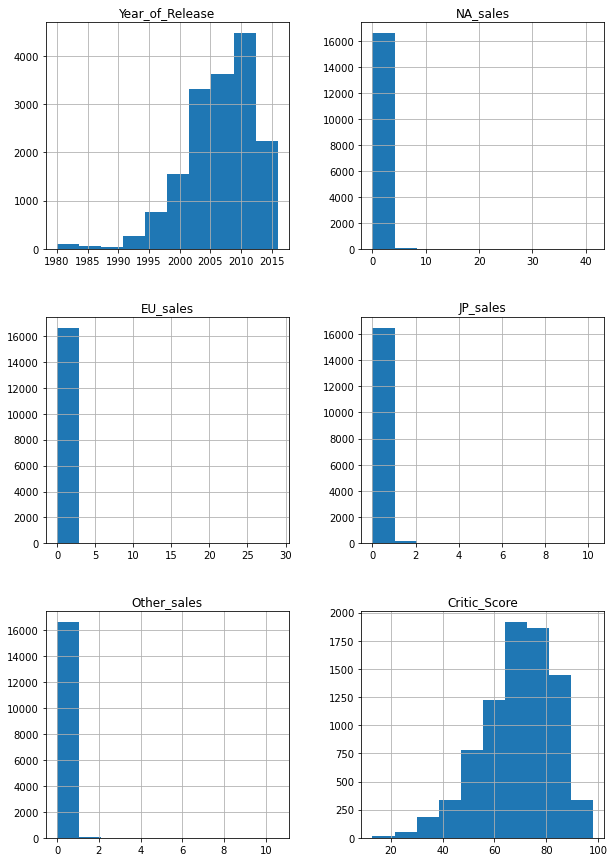

In [5]:
df.hist(figsize=(10, 15));

Мы считали файл с данными в датафрейм *df*. Датафрейм содержит 11 столбцов и 16715 строк.

Далее будет необходимо переименовать столбцы, преобразовав их названия к нижнему регистру.

В столбцах name, year_of_release, genre, critic_score, user_score, rating содержатся пропуски.
Для некоторых столбцов необходимо изменить тип данных: year_of_release (float64 -> int), user_score (object -> float)

## Подготовка данных

### Переименование столбцов

Во избежании ошибок в дальнейшем переименуем столбы в соответствии со змеиной нотацией.

In [6]:
# Приводим названия столбцов к нижнему регистру

df.columns = df.columns.str.lower()
list(df) # Проверка

['name',
 'platform',
 'year_of_release',
 'genre',
 'na_sales',
 'eu_sales',
 'jp_sales',
 'other_sales',
 'critic_score',
 'user_score',
 'rating']

### Обработка пропусков
Рассмотрим подробнее столбцы с пропусками

In [7]:
print('Процент пропусков в столбцах')
print(df.isna().sum() / df.shape[0] * 100)
print('Число столбцов с пропусками: ', df.isna().any().sum())

Процент пропусков в столбцах
name                0.011965
platform            0.000000
year_of_release     1.609333
genre               0.011965
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.319174
user_score         40.089740
rating             40.478612
dtype: float64
Число столбцов с пропусками:  6


#### name и genre

In [8]:
# Выведем на экран строки с пропусками в столбце name

df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Значения столбца *name* очень важны для анализа, поскольку без названия игры анализ невозможен. Процент пропусков в столбце *name* очень мал (0,01%). Также обратим внимание, что именно эти две строки содержат и пропуски в столбце *genre*. Удалим эти 2 строки и таким образом избавимся от пропусков сразу в двух столбцах: *name* и *genre*.

In [9]:
# Удаляем строки с пропусками в столбце name (эти же строки являются строками с пропуском в столбце genre)

df.dropna(subset=['name'], inplace=True)

#### year_of_release

В столбце *year_of_release* содержится 1.6% пропусков. Заполнение пропусков средним или медианным значением может привести к искажению результатов анализа. Поэтому мы решаем строки с пропусками в столбце *year_of_release* удалить.

In [10]:
# Выводим на экран строки с пропусками в столбце year_of_release

display(df[df['year_of_release'].isna()].sample(10))
print('Число строк с пропусками в столбце year_of_release', df['year_of_release'].isna().sum())

# Удаляем строки с пропусками в столбце year_of_release

print('Размер таблицы до удаления пропусков', df.shape)
df.dropna(subset=['year_of_release'], inplace=True)
print('Размер таблицы после удаления пропусков', df.shape)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
6101,Haven: Call of the King,PS2,NaN,Platform,0.14,0.11,0.00,0.04,69.0,6.9,T
16180,WRC: FIA World Rally Championship,PC,NaN,Racing,0.00,0.01,0.00,0.00,65.0,NaN,RP
4635,NHL Slapshot,Wii,NaN,Sports,0.39,0.00,0.00,0.02,76.0,8.1,E
7724,Dead Space 3,PC,NaN,Action,0.02,0.16,0.00,0.02,78.0,6,M
9827,WRC: FIA World Rally Championship,X360,NaN,Racing,0.00,0.10,0.00,0.02,66.0,6,E10+
15557,Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales),Wii,NaN,Racing,0.00,0.00,0.02,0.00,NaN,NaN,NaN
5655,All-Star Baseball 2005,PS2,NaN,Sports,0.16,0.12,0.00,0.04,72.0,8.6,E
2132,LEGO Harry Potter: Years 5-7,X360,NaN,Action,0.51,0.37,0.00,0.09,77.0,7.9,E10+
9119,Our House Party!,Wii,NaN,Simulation,0.13,0.00,0.00,0.01,NaN,NaN,NaN
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN


Число строк с пропусками в столбце year_of_release 269
Размер таблицы до удаления пропусков (16713, 11)
Размер таблицы после удаления пропусков (16444, 11)


#### critic_score и user_score

В этих столбцах больше всего пропусков.

<b>Причинами пропусков</b> в столбцах с оценками экспертов и пользователей <i>critic_score</i> и  <i>user_score</i> могут быть: 1) недостаточная популярность игры, из-за чего числа отзывов не хватает для подсчета оценки; 2) на момент среза данных игра была новой и не успела получить оценку экспертов и/или пользователей; 3) при сборе данных поля с оценками отсутствовали или были недоступны для заполнения.

В столбцах <i>critic_score</i> и <i>user_score</i> около 50% пропусков. Поскольку оценки критиков и пользователей зависят от большого числа факторов, у нас нет необходимой информации для заполнения пропусков статистическими значениями.Чтобы не искажать распределение и статистики данных, не будем заполнять пропуски в этих столбцах и оставим значение NaN.

#### rating

Пропуски в столбце <i>rating</i> с рейтингами ESRB могут быть связаны с тем, что данные указаны только для игр, произведенных в Северной Америке, поскольку ESRB - американская организация. Для других игр рейтинги могут устанавливаться организациями стран выпуска, например, PEGI для Европы и CERO для Японии.

В столбе <i>rating</i> около 40% пропусков. Поскольку в каждом регионе может использоваться своя организация для определения рейтинга, у нас нет необходимой информации для заполнения пропусков статистическими значениями. Чтобы не искажать распределение и статистики данных, не будем заполнять пропуски в столбце <i>rating</i> и оставим значение NaN.

### Преобразование типов

Преобразуем типы данных для следующих столбцов:
- *year_of_release*: float64 -> int (потому что год является целым числом)
- *user_score*: object -> float (оценка пользователей - дробное число < 10)

In [11]:
# Выполняем преобоазования типов для столбца year_of_release

df['year_of_release'] = df['year_of_release'].astype(int)

Рассмотрим подробнее столбец *user_score*.

In [12]:
# Выведем на экран уникальные значения из столбца

display(df['user_score'].unique())

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [13]:
# Выведем на экран число значений 'tbd'

print('Число значение tbd в столбце user_score: ', df[df['user_score'] == 'tbd']['user_score'].count())

Число значение tbd в столбце user_score:  2376


В столбце содержится 2424 значения tbd = 'to be determined'. Такие значения могли появиться по нескольких причинам. Например, недостотаточно пользовательских голосов, чтобы выдать результат, или игра вышла, но не дошла до пользователя на момент среза данных. Чтобы эти значения не мешали нам в обработке значений, будем считать, что они эквивалентны NaN и выполним соответсвующую замену.

Сделаем копию первоначального столбца в столбец user_score_with_tbd. А в столбце user_score заменим значения tbd на NaN.

In [14]:
df['user_score_with_tbd'] = df['user_score']
df['user_score'] = df['user_score'].replace('tbd', np.nan)

Выполняем преобразования типов для столбцов user_score.

In [15]:
df['user_score'] = df['user_score'].astype('float32')

Выводим на экран типы после преобразования для проверки.

In [16]:
print('Тип данных в столбце year_of_release после преобразования:', df['year_of_release'].dtype)
print('Тип данных в столбце user_score после преобразования:', df['user_score'].dtype)

Тип данных в столбце year_of_release после преобразования: int32
Тип данных в столбце user_score после преобразования: float32


### Добавление столбца с суммарными продажами

Добавим столбец all_sales (миллионы проданных копий во всех странах).

In [17]:
df['all_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df['all_sales'].head()

0    82.54
1    40.24
2    35.52
3    32.77
4    31.38
Name: all_sales, dtype: float64

### Поиск дубликатов

#### Поиск явных дубликатов

Посчитаем количество явных дубликатов.

In [18]:
df.duplicated().sum()

0

#### Поиск неявных дубликатов

Поскольку игра определяется названием и платформой, рассмотрим пары *name-platform* на предмет дубликатов.

In [19]:
# Поиск дубликатов по столбцам name и platform

df.loc[df.duplicated(subset=['name', 'platform'], keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,user_score_with_tbd,all_sales
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E,5.5,2.56
1190,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T,8.5,1.56
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T,8.5,1.25
5972,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T,8.5,0.29
11715,Need for Speed: Most Wanted,PC,2012,Racing,0.00,0.06,0.00,0.02,82.0,8.5,T,8.5,0.08
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E,5.5,0.01


Мы нашли 3 пары дубликатов. Удалим дублирующие строки.

In [20]:
# Удаление дубликатов по паре name-platform

df.drop_duplicates(subset=['name', 'platform'], inplace=True)
display(df.duplicated(subset=['name', 'platform']).sum()) # Проверка

0

## Исследовательский анализ данных

### Распределение выпуска игр по годам

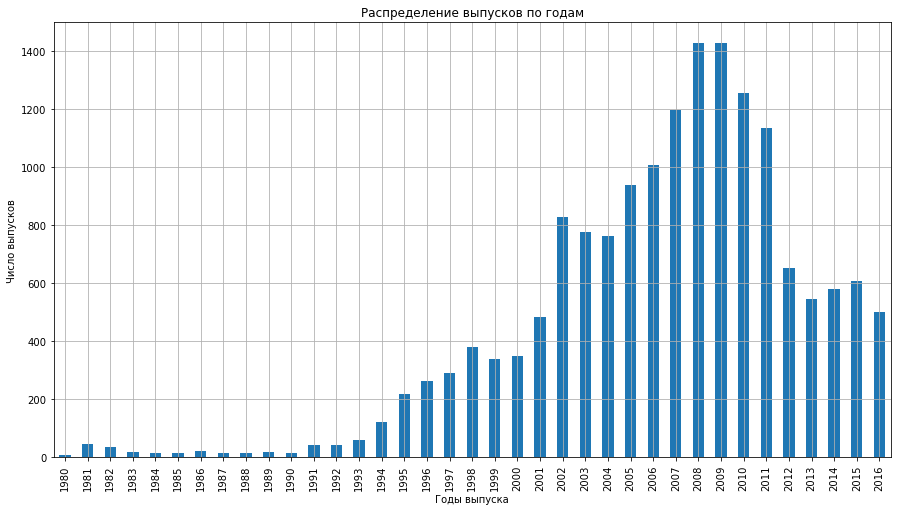

In [21]:
# Посмотрим, сколько игр выпускалось в каждые годы
# Построим диаграмму распределения выпусков по годам

(df.groupby('year_of_release')['year_of_release']
   .count()
   .plot(kind='bar', 
         figsize=(15, 8), 
         grid=True,
         title='Распределение выпусков по годам')
    .set(xlabel='Годы выпуска',
         ylabel='Число выпусков'));

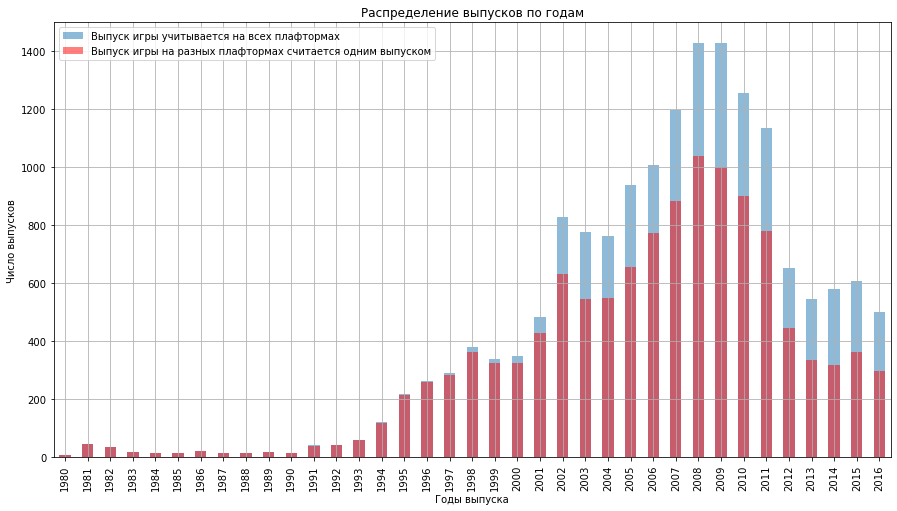

In [22]:
# Построим график распределения выпусков по годам, в котором учитывается выход игры на любой платформе

fig, ax = plt.subplots()
(df.groupby('year_of_release')['year_of_release']
   .count()
   .plot(kind='bar', 
         figsize=(15, 8), 
         grid=True,
         title='Распределение выпусков по годам',
         alpha=0.5,
         ax=ax)
    .set(xlabel='Годы выпуска',
         ylabel='Число выпусков'));

# Находим игры, которые в одном году выходили на нескольких плафтормах и оставляем только одну строчку,
# которая будет учитываться в сумме для распределения выпуска по годам
# График будет отрисовываться красным цветом.

(df.drop_duplicates(subset=['name', 'year_of_release'])
   .groupby('year_of_release')['year_of_release']
   .count()
   .plot(kind='bar', 
         figsize=(15, 8), 
         grid=True,
         title='Распределение выпусков по годам',
         alpha=0.5,
         ax=ax,
         color='red')
    .set(xlabel='Годы выпуска',
         ylabel='Число выпусков'));
ax.legend(['Выпуск игры учитывается на всех плафтормах', 'Выпуск игры на разных плафтормах считается одним выпуском']);

Рост числа выпусков в период с 1994 по 2008 год связан с быстрым развитием и выходом новых плафторм. Как видно из сравнения графиков, начиная с 1997 года игры начали выпускать сразу на нескольких плафтормах, причем количество альтернативных платформ увеличивалось и достигало максимума в 2009-2011 годы. Это может быть связано с тем, что в этот период было много популярных платформ.

Выведем статистические данные по столбцу year_of_release.

In [23]:
df['year_of_release'].describe()

count    16441.000000
mean      2006.485676
std          5.875735
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

Для удобства преобразуем его к типу int.

In [24]:
df.year_of_release = df.year_of_release.astype(int)

Выведем на экран процент выпусков, вышедших после 2014 года.

In [25]:
print('Процент выпусков после 2014 года: {:.0%}'.format(\
    df[df.year_of_release >= 2014]['year_of_release'].count() / df.shape[0]))

Процент выпусков после 2014 года: 10%


### Изменение продаж по платформам

Посмотрим, как менялись продажи по платформам и распределение продаж по годам для всех платформ.

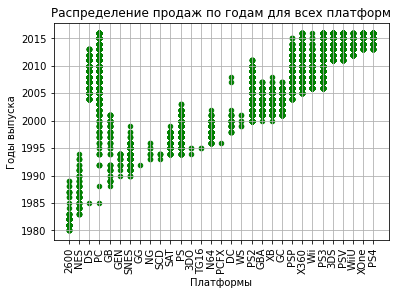

In [26]:
(df.sort_values(by='year_of_release')
   .plot(x='platform', 
         y='year_of_release', 
         kind='scatter', 
         grid=True, 
         c='green',
         title='Распределение продаж по годам для всех платформ')
    .set(xlabel='Платформы',
         ylabel='Годы выпуска'));
plt.xticks(rotation=90)
plt.show()

Определим 5 платформ с наибольшими суммарными продажами.

In [27]:
top_platforms = (df.pivot_table(index='platform', values='all_sales', aggfunc='sum')
                  .sort_values(by='all_sales', ascending=False)
                  .head()
                )
display(top_platforms)

,all_sales
platform,
PS2,1233.56
X360,959.99
PS3,931.33
Wii,891.18
DS,802.78


Построим для этих платформ распределение продаж по годам.

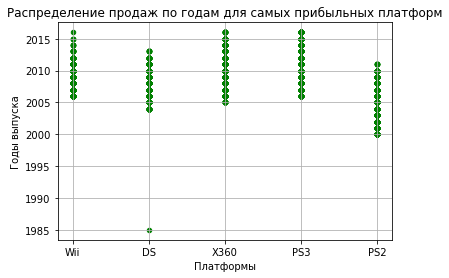

In [28]:
(df.query('platform in @top_platforms.index')
  .plot(x='platform', 
        y='year_of_release', 
        kind='scatter', 
        grid=True, 
        c='green', 
        title='Распределение продаж по годам для самых прибыльных платформ')
  .set(xlabel='Платформы', 
       ylabel='Годы выпуска'));

Как видно из графиков, игры для конкретных платформ выпускаются в течение нескольких лет. Рассмотрим эти промежутки для всех платформ.

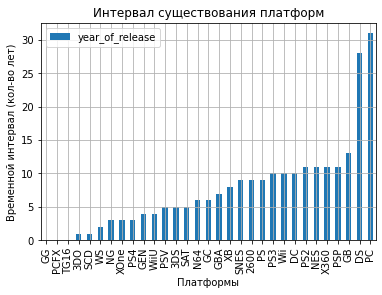

In [29]:
(
    df.pivot_table(index='platform', values=['year_of_release'], aggfunc=lambda x: x.max() - x.min())
      .sort_values(by='year_of_release')
      .plot(kind='bar', grid=True, title='Интервал существования платформ')
      .set(xlabel='Платформы',
           ylabel='Временной интервал (кол-во лет)')
);

Значения для платформ *DC* и *PC* сильно отличаются, поэтому посчитаем медианное значение для этого интервала.

In [30]:
print('Характерный срок существования платформ: {} лет'.format(
        df.pivot_table(index='platform', values=['year_of_release'], aggfunc=lambda x: x.max() - x.min())
          .median()[0])
)

Характерный срок существования платформ: 6.0 лет


Мы вычислили, что средняя продолжительность использования плафтормы составляет 6 лет.

   ### Выбор актуального периода

Поскольку компьютерные игры являются стремительно развивающейся индустрией, в качестве актуального периода выберем 3 года: с 2014 по 2016.

Чтобы данные за предыдущие годы не мешали нам, удалим записи, в которых *year_of_release* < 2014, и сохраним результат в новый датафрейм df_new.

In [31]:
df_new = df.drop(df[df['year_of_release'] < 2014].index)

### Анализ изменения продаж по платформам

Отобразим самые прибыльные плафтормы за актуальный период.

In [32]:
# Определяем топ-5 прибыльных плафторм за актуальный период.
# Сохраняем их в top_new_platforms для дальнейшего использования

top_new_platforms = (
    df_new.pivot_table(index='platform', values='all_sales', aggfunc='sum')
          .sort_values(by='all_sales', ascending=False)
          .head()
)
top_new_platforms

,all_sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22


Теперь рассмотрим, как распределяются продажи для этих плафторм.

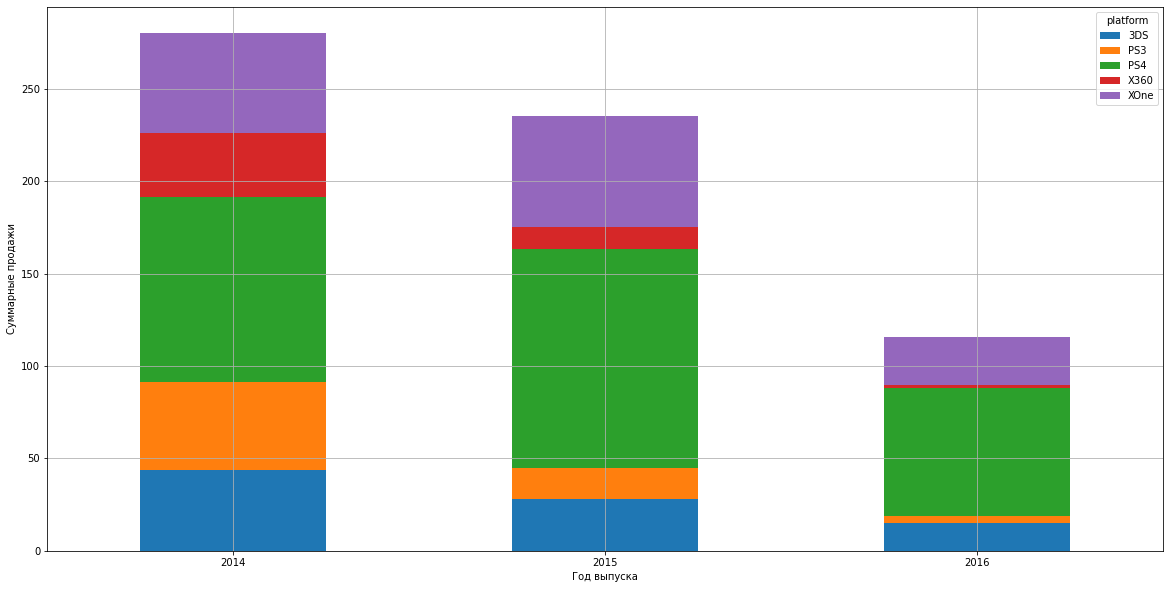

In [33]:
# Построим распределение по общим продажам для самых прибыльных плафторм
(
    df_new.query('platform in @top_new_platforms.index')
          .pivot_table(
              index=['year_of_release'],
              columns=['platform'], 
              values='all_sales',
              aggfunc='sum')
          .plot.bar(rot=0, grid=True, figsize=(20, 10), stacked=True)
         .set(xlabel='Год выпуска',
              ylabel='Суммарные продажи')
);

Мы видим, что для всех платформ продажи падают.

Рассмотрим распределение продаж для всех платформ.

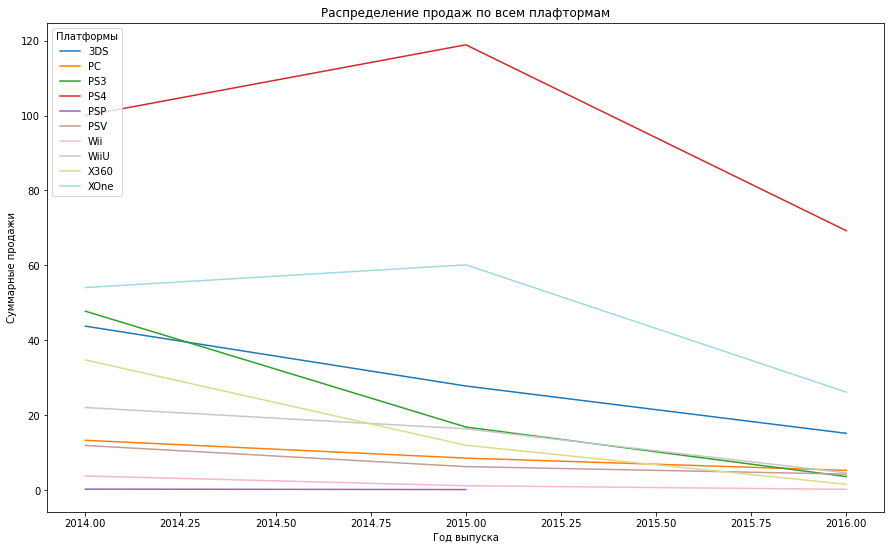

In [34]:
# Построим распределение общих продаж по всем плафтормам
(
    df_new.pivot_table(index=['year_of_release'], 
                       columns=['platform'], 
                       values='all_sales', 
                       aggfunc='sum')
          .plot.line(colormap='tab20', title='Распределение продаж по всем плафтормам', figsize=(15, 9))
          .set(xlabel='Год выпуска',
               ylabel='Суммарные продажи')
);
plt.legend(title='Платформы', loc='upper left')
plt.show()

Выведем на экран данные о прибыльности плафторм за 2016 год.

In [35]:
display(
    df_new.query('year_of_release == 2016')
          .pivot_table(index='platform', values='all_sales', aggfunc='sum')
          .sort_values(by='all_sales', ascending=False)
)

,all_sales
platform,
PS4,69.25
XOne,26.15
3DS,15.14
PC,5.25
WiiU,4.60
PSV,4.25
PS3,3.60
X360,1.52
Wii,0.18


Как видно из графиков, продажи падают для всех плафторм. Возможно, это связано с ростом популярности мобильных игр, а также снижением покупательской способности населения. Второе может объяснить и то, что продажи для платформы *PC* относительно стабильны на протяжении всего интервала наблюдения. Однако в последние 5 лет и здесь наблюдается спад. Тем не менее *PC* можно отнести к потенциально прибыльным платформам, равно как и *PS4, XOne, 3DS, WiiU*.

**Вывод.** К самым перспективным платформам можно отнести:
- *PC*, из-за стабильности на протяжении многих лет и распространенности среди пользователей;
- *PS4*, поскольку на момент 2016 года это самая прибыльная платформа, также она является новым поколением одной из самых прибыльных серий (предыдущие выпуски PS2 и PS3) входят в определенные нами топ-5 самых прибыльных платформ;
- *XOne*, вторая по прибыльности на момент 2016 года, ее предшественница, плафторма X360, входит в топ-5 самых прибыльных плафторм;
- *3DS*, третяя по прибыльности на 2016 год, ее предшественница, платформа DS, входит в топ-5 самых прибыльных платформ;
- *WiiU*, пятая по прибыльности за 2016 год, ее предшественница, платформа Wii, входит в топ-5 самых прибыльных плафторм.

### Ящик с усами по глобальным продажам игр в разбивке по платформам

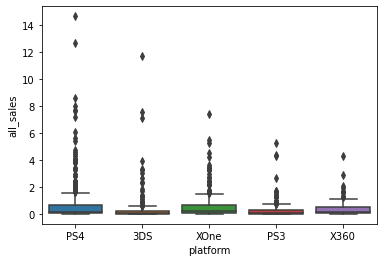

In [36]:
# Построим ящик с усами по глобальным продажам игр в разбивке по платформам

sns.boxplot(data=df_new.query('platform in @top_new_platforms.index'), x='platform', y='all_sales')
plt.show()

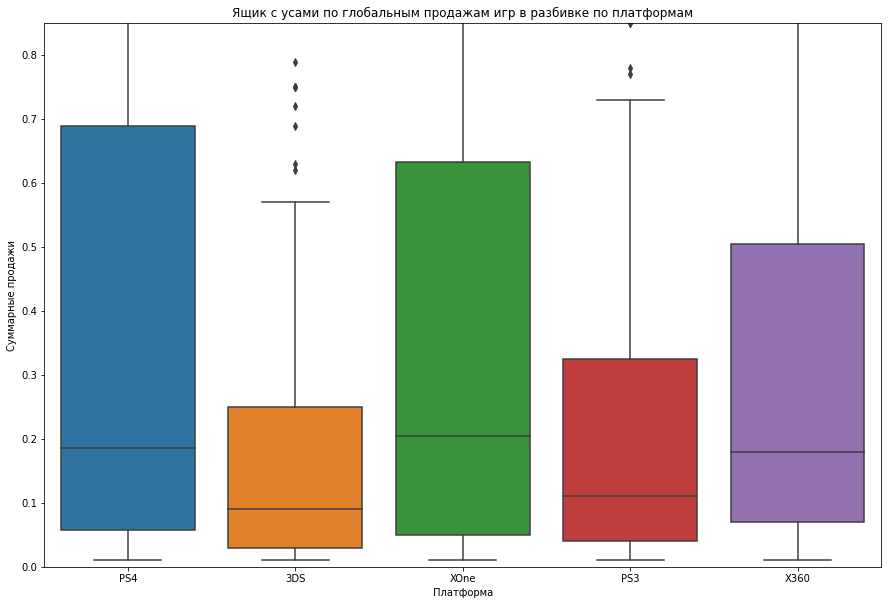

In [37]:
# Рассмотрим ближе значения от 0 до 0.85 млн

plt.figure(figsize=(15, 10))
sns.boxplot(data=df_new.query('platform in @top_new_platforms.index'), x='platform', y='all_sales')
plt.ylim(0, 0.85)
plt.title('Ящик с усами по глобальным продажам игр в разбивке по платформам')
plt.xlabel('Платформа')
plt.ylabel('Суммарные продажи')
plt.show()

Выведем на экран статистические характеристики по каждой платформе.

In [38]:
df.query('platform in @top_new_platforms.index').groupby('platform')['all_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,512.0,0.503535,1.441271,0.01,0.05,0.12,0.3325,14.60
PS3,1305.0,0.713663,1.403467,0.00,0.11,0.28,0.7600,21.05
PS4,392.0,0.801378,1.609456,0.01,0.06,0.20,0.7300,14.63
X360,1231.0,0.779846,1.632731,0.01,0.11,0.28,0.7700,21.82
XOne,247.0,0.645020,1.036139,0.01,0.06,0.22,0.6850,7.39


- Из диаграмм размаха видно, что для всех 5 диаграмм характерны выбросы со значениями, значиетельно превышающими границу верхнего квартиля.
- Платформа *3DS* имеет самый маленький межквартильный размах, а *PS4* - самый большой. 
- Для платформ *XOne* и *PS4* продано наименьшее число копий игр. Возможно, это связано с тем, что приставки вышли позже остальных приставок в списке.
- Медианное значение для платформы *3DS* значительно меньше остальных платформ.

### Исследование влияния отзывов пользователей и критиков на продажи

Для примера рассмотрим, как влияют на продажи внутри платформы **PS3** отзывы пользователей и критиков.

**Отзывы критиков**

Создадим таблицу с данными только по плафторе PS3.

In [39]:
ps3_df = df_new.query('platform == "PS3"')[['critic_score', 'user_score', 'all_sales']]

Построим диаграмму рассеяния для _оценки критиков_.

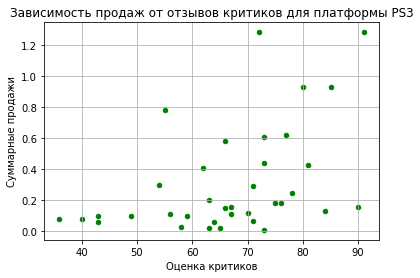

In [40]:
(ps3_df.plot(x='critic_score', 
             y='all_sales', 
             kind='scatter', 
             grid=True, 
             c='green',
             title='Зависимость продаж от отзывов критиков для платформы PS3')
        .set(xlabel='Оценка критиков',
             ylabel='Суммарные продажи'));

Построим диаграмму рассеяния для _оценки пользователей.

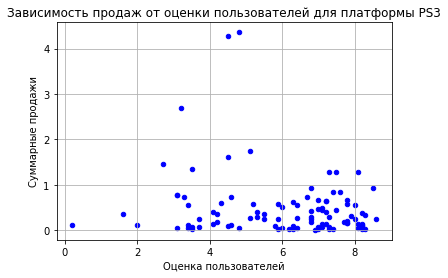

In [41]:
(ps3_df.plot(x='user_score', 
             y='all_sales', 
             kind='scatter', 
             grid=True, 
             c='blue',
             title='Зависимость продаж от оценки пользователей для платформы PS3')
        .set(xlabel='Оценка пользователей',
             ylabel='Суммарные продажи'));

Посчитаем корреляцию между оценками и продажами.

In [42]:
print('Корреляция между оценками критиков и продажами для платформы PS3',\
      round(ps3_df['critic_score'].corr(ps3_df['all_sales']), 2))
print('Корреляция между оценками пользователей и продажами для платформы PS3', \
      round(ps3_df['user_score'].corr(ps3_df['all_sales']), 2))

Корреляция между оценками критиков и продажами для платформы PS3 0.45
Корреляция между оценками пользователей и продажами для платформы PS3 -0.17


### Выводы

Оценки критиков демонстрируют прямую, средне-слабую корреляцию с продажами для популярных платформ. Корреляции между оценками пользоваталей и продажами нет.

### Соотношение выводов с продажами игр на других платформах

Посчитаем коэффициент корреляции Пирсона для всех топ-5 популярных платформ.

In [43]:
for platform in top_new_platforms.index:
    data = df_new.query('platform == @platform')[['critic_score', 'user_score', 'all_sales']]
    print('Корреляция между оценками и продажами для плафтормы', platform)
    print('Оценки критиков:', round(data['critic_score'].corr(data['all_sales']), 2))
    print('Оценки пользователей:', round(data['user_score'].corr(data['all_sales']), 2))

Корреляция между оценками и продажами для плафтормы PS4
Оценки критиков: 0.4
Оценки пользователей: -0.04
Корреляция между оценками и продажами для плафтормы XOne
Оценки критиков: 0.43
Оценки пользователей: -0.07
Корреляция между оценками и продажами для плафтормы 3DS
Оценки критиков: 0.31
Оценки пользователей: 0.22
Корреляция между оценками и продажами для плафтормы PS3
Оценки критиков: 0.45
Оценки пользователей: -0.17
Корреляция между оценками и продажами для плафтормы X360
Оценки критиков: 0.53
Оценки пользователей: -0.14


Полученный результат подтверждает выводы, сделанные для популярных игр о средне-слабой корреляции между оценками критиков и продажами и отсутствии корреляции между оценками пользователей и продажами.

Оценим зависимость продаж от оценок для всех остальных плафторм (платформ не из списка топ-5).

In [44]:
data =  df_new.query('platform not in @top_new_platforms.index')[['critic_score', 'user_score', 'all_sales']]
print('Корреляция между оценками и продажами для плафторм не из списка топ-5')
print('Оценки критиков:', round(data['critic_score'].corr(data['all_sales']), 2))
print('Оценки пользователей:', round(data['user_score'].corr(data['all_sales']), 2))

Корреляция между оценками и продажами для плафторм не из списка топ-5
Оценки критиков: 0.19
Оценки пользователей: 0.12


Мы видим, что для остальных платформ корреляция между продажами и оценкой пользователей и критиков слабая.

### Общее распределение продаж по жанрам

Рассмотрим распределение игр по жанрам. В качестве аггрегирующей функции выбираем медиану, чтобы избежать влияния игр, "берущих количеством".

genre,Adventure,Puzzle,Strategy,Action,Misc,Racing,Simulation,Role-Playing,Fighting,Platform,Sports,Shooter
all_sales,0.03,0.045,0.06,0.09,0.09,0.09,0.1,0.11,0.125,0.14,0.18,0.515


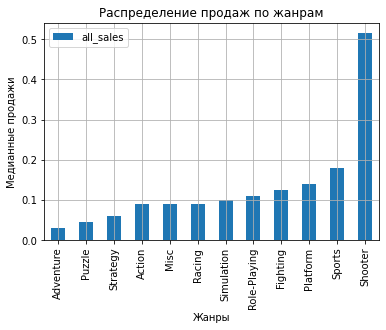

In [45]:
genre_df = df_new.pivot_table(index='genre', values='all_sales', aggfunc='median')
(
    genre_df.sort_values(by='all_sales')
            .plot(kind='bar', grid=True, title='Распределение продаж по жанрам')
            .set(xlabel='Жанры',
                 ylabel='Медианные продажи')
);

# Выводим численные значения в виде таблицы

genre_df.sort_values(by='all_sales').T

In [46]:
df_new.pivot_table(index='genre', values='all_sales', aggfunc='median').describe()

,all_sales
count,12.000000
mean,0.131250
std,0.127585
min,0.030000
25%,0.082500
50%,0.095000
75%,0.128750
max,0.515000


Самым прибыльным жанром является Shooter. Можно сказать, что в жанрах, расположенных ниже первого квартиля, продается меньше игр. Это Adventure, Puzzle и Strategy. В жанрах, расположенных выше последнего квартиля, продается больше игр. Это Platform, Sports и Shooter.

## Составление портрета пользователя по регионам

Рассмотрим пользователей каждого региона (NA, EU, JP).

Определим самые популярные платформы и жанры и опишем различия в долях продаж.

In [47]:
# Функция получает на вход название столбца, по которому надо отобрать 5 самых популярных элементов,
# и выводит на экран эти элементы.

def get_popular(column_name):
    # Создадим словарь названий столбцов - продажи по разным регионам
    sale_list = {'na_sales': 'Северная Америка',
                 'eu_sales': 'Европа',
                 'jp_sales': 'Япония'}

    # Для каждого рынка (na, eu, jp) отбираем топ5 платформ, счиаем доли от всех продаж по региону и выводим результат
    for item in sale_list.keys():
        q = (df_new.pivot_table(index=column_name, values=item, aggfunc='sum')
               .sort_values(by=item, ascending=False)
               .head())
    
        # Считаем долю от суммарной продажи в регионе
        q[item] = q[item] / q[item].sum()
    
        # Выводим результат на экран по каждому рынку
        print('Анализ долей продаж для рынка', sale_list[item])
        print('________________________________________________')
        display(q[item])
        display(q[item].describe())

### Исследование популярных платформ

In [48]:
get_popular('platform')

Анализ долей продаж для рынка Северная Америка
________________________________________________


platform
PS4     0.389963
XOne    0.321390
X360    0.111915
3DS     0.089532
PS3     0.087199
Name: na_sales, dtype: float64

count    5.000000
mean     0.200000
std      0.144489
min      0.087199
25%      0.089532
50%      0.111915
75%      0.321390
max      0.389963
Name: na_sales, dtype: float64

Анализ долей продаж для рынка Европа
________________________________________________


platform
PS4     0.551204
XOne    0.196041
PS3     0.108257
PC      0.076170
3DS     0.068328
Name: eu_sales, dtype: float64

count    5.000000
mean     0.200000
std      0.202761
min      0.068328
25%      0.076170
50%      0.108257
75%      0.196041
max      0.551204
Name: eu_sales, dtype: float64

Анализ долей продаж для рынка Япония
________________________________________________


platform
3DS     0.479151
PS4     0.162677
PSV     0.157479
PS3     0.121521
WiiU    0.079173
Name: jp_sales, dtype: float64

count    5.000000
mean     0.200000
std      0.159597
min      0.079173
25%      0.121521
50%      0.157479
75%      0.162677
max      0.479151
Name: jp_sales, dtype: float64

Мы сравнили три рынка продаж: Северную Америку, Японию и Европу.
- Для каждого рынка топ-5 самых прибыльных платформ (платформы и их положение в рейтинге) отличается.
- Для Европы и Америки список топ-5 платформ практически совпадает (отличие в одном пункте).
- В Европе доля лидера продаж PS4 в 2 раза превышает плафторму, занимающую 2 место в рейтинге. Для Японии аналогичная ситуация: доля продаж лидера 3DS значительно превышает остальные плафтормы. В Америке между первым и вторым местом (PS4 и XOne) разрыв небольшой.
- В Японии наиболее популярны японские игровые плафтормы.

### Исследование популярных жанров

In [49]:
get_popular('genre')

Анализ долей продаж для рынка Северная Америка
________________________________________________


genre
Shooter         0.320959
Action          0.294598
Sports          0.187368
Role-Playing    0.135946
Misc            0.061129
Name: na_sales, dtype: float64

count    5.000000
mean     0.200000
std      0.108544
min      0.061129
25%      0.135946
50%      0.187368
75%      0.294598
max      0.320959
Name: na_sales, dtype: float64

Анализ долей продаж для рынка Европа
________________________________________________


genre
Action          0.327214
Shooter         0.287079
Sports          0.200368
Role-Playing    0.123428
Racing          0.061911
Name: eu_sales, dtype: float64

count    5.000000
mean     0.200000
std      0.110338
min      0.061911
25%      0.123428
50%      0.200368
75%      0.287079
max      0.327214
Name: eu_sales, dtype: float64

Анализ долей продаж для рынка Япония
________________________________________________


genre
Role-Playing    0.401598
Action          0.381235
Fighting        0.082098
Misc            0.072303
Shooter         0.062766
Name: jp_sales, dtype: float64

count    5.000000
mean     0.200000
std      0.175020
min      0.062766
25%      0.072303
50%      0.082098
75%      0.381235
max      0.401598
Name: jp_sales, dtype: float64

Пользователи из Америки и Европы предпочитают практически одинаковые жанры игр Shooter и Action, причем распределение продаж также практически одинаково. Среди пользователей Японии самый популярный жанр - *Role-Playing*. При этом  в Японии на игры этого жанра приходится 40% всех продаж.

### Исследование влияния рейтинга ESRB на продажи в отдельном регионе

Исследуем влияние рейтинга ESRB на продажи в отдельном регионе.

In [50]:
# Воспользуемся функцией get_popular, чтобы посмотреть, как распределяется прибыль по рейтингам.

get_popular('rating')

Анализ долей продаж для рынка Северная Америка
________________________________________________


rating
M       0.439592
E       0.231330
T       0.177578
E10+    0.151500
Name: na_sales, dtype: float64

count    4.000000
mean     0.250000
std      0.130691
min      0.151500
25%      0.171059
50%      0.204454
75%      0.283396
max      0.439592
Name: na_sales, dtype: float64

Анализ долей продаж для рынка Европа
________________________________________________


rating
M       0.441317
E       0.274217
T       0.160912
E10+    0.123554
Name: eu_sales, dtype: float64

count    4.000000
mean     0.250000
std      0.142728
min      0.123554
25%      0.151573
50%      0.217565
75%      0.315992
max      0.441317
Name: eu_sales, dtype: float64

Анализ долей продаж для рынка Япония
________________________________________________


rating
T       0.408400
E       0.247030
M       0.221332
E10+    0.123238
Name: jp_sales, dtype: float64

count    4.000000
mean     0.250000
std      0.118307
min      0.123238
25%      0.196809
50%      0.234181
75%      0.287372
max      0.408400
Name: jp_sales, dtype: float64

Чтобы учесть в исследовании игры, для которых не указан рейтинг, заполним пропуски в столбце _rating_ значением "not defined".

Выясним, сколько пропусков в столбце _rating_.

In [51]:
print('Число пропусков в столбце rating', df_new['rating'].isna().sum())

Число пропусков в столбце rating 749


Создадим новый столбец rating_stub, в который скопируем столбец _rating_, заполнив в нем пропуски значением "not defined".

In [52]:
df_new['rating_stub'] = df_new['rating'].fillna(value='not defined')

# Проверка
print('Число пропусков в столбце rating_stub', df_new['rating_stub'].isna().sum())

Число пропусков в столбце rating_stub 0


Определяем распределение долей продаж с учетом игр без рейтинга.

In [53]:
get_popular('rating_stub')

Анализ долей продаж для рынка Северная Америка
________________________________________________


rating_stub
M              0.339435
not defined    0.227839
E              0.178624
T              0.137119
E10+           0.116982
Name: na_sales, dtype: float64

count    5.000000
mean     0.200000
std      0.088770
min      0.116982
25%      0.137119
50%      0.178624
75%      0.227839
max      0.339435
Name: na_sales, dtype: float64

Анализ долей продаж для рынка Европа
________________________________________________


rating_stub
M              0.345205
not defined    0.217785
E              0.214497
T              0.125868
E10+           0.096645
Name: eu_sales, dtype: float64

count    5.000000
mean     0.200000
std      0.097196
min      0.096645
25%      0.125868
50%      0.214497
75%      0.217785
max      0.345205
Name: eu_sales, dtype: float64

Анализ долей продаж для рынка Япония
________________________________________________


rating_stub
not defined    0.611236
T              0.158771
E              0.096036
M              0.086046
E10+           0.047911
Name: jp_sales, dtype: float64

count    5.000000
mean     0.200000
std      0.233313
min      0.047911
25%      0.086046
50%      0.096036
75%      0.158771
max      0.611236
Name: jp_sales, dtype: float64

***Вывод***

Для Европы и Америки наибольшую прибыль приносят игры категорий M (для взрослых). В Японии самыми прибыльными являются игры категории not defined, то есть игры, для которых рейтинг не указан. Скорее всего это японские игры, для которых рейтинг определяется японской организацией (например, CERO).

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Формулируем нулевую гипотезу таким образом, чтобы использовать знак равенства: "Средний пользовательский рейтинг платформы Xbox One = cредний пользовательский рейтинг платформы PC". Формулируем альтернативную двустороннюю гипотезу, потому что есть возможное отклонение и в большую, и в меньшую стороны: "средний пользовательский рейтинг платформы Xbox One ≠ cредний пользовательский рейтинг платформы PC". Выберем стандартный уровень статистической значимости 5%. Будем использовать метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам *scipy.stats.ttest_ind*.

H_0: Средний пользовательский рейтинг платформы Xbox One = cредний пользовательский рейтинг платформы PC

H_a: Средний пользовательский рейтинг платформы Xbox One ≠ cредний пользовательский рейтинг платформы PC

alpha = 0.05

In [54]:
sample1 = df_new[df_new['platform'] =='XOne']['user_score']
sample2 = df_new[df_new['platform'] =='PC']['user_score']

results = st.ttest_ind(sample1, sample2, equal_var = False, nan_policy='omit')

alpha = 0.05

print(results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.1160137942843255
Не получилось отвергнуть нулевую гипотезу


**Вывод**

Средние пользовательские рейтинги плафторм Xbox One и PC различаются незначимо.

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

Формулируем нулевую гипотезу таким образом, чтобы использовать знак равенства: "Средний пользовательский рейтинг жанра Action = cредний пользовательский рейтинг жанра Sports". Формулируем альтернативную двустороннюю гипотезу, потому что есть возможное отклонение и в большую, и в меньшую стороны: "Средний пользовательский рейтинг жанра Action ≠ cредний пользовательский рейтинг жанра Sports". Выберем стандартный уровень статистической значимости 5%. Будем использовать метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам *scipy.stats.ttest_ind*.

H_0: Средний пользовательский рейтинг жанра Action = cредний пользовательский рейтинг жанра Sports

H_a: Средний пользовательский рейтинг жанра Action ≠ cредний пользовательский рейтинг жанра Sports

alpha = 0.05

In [55]:
sample1 = df_new[df_new['genre'] =='Action']['user_score']
sample2 = df_new[df_new['genre'] =='Sports']['user_score']

results = st.ttest_ind(sample1, sample2, equal_var = False, nan_policy='omit')

alpha = 0.05

print(results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

1.1825796838209034e-14
Отвергаем нулевую гипотезу


**Вывод**

Средние пользовательские рейтинги жанров Action и Sports значимо различаются.

## Общий вывод

Мы проанализировали данные о компьютерных играх, включающие информацию о продажах, пользовательских и экспертных оценках, жанрах и платформах.

В рамках *предобработки данных* мы выполнили следующие действия:
- Переименовали столбцы в соответствии со змеиной нотацией
- Преобразовали тип столбца *year_of_release*
- Преобразовали тип столбца user_score:
	В стобце содержались значения *tbd* = to be determined. Такие значения могли появиться по нескольких причинам. Например, недостотаточно пользовательских голосов, чтобы выдать результат, или игра вышла, но не дошла до пользователя на момент среза данных. Чтобы эти значения не мешали нам в обработке значений, мы приравняли их к NaN и выполнили соответсвующую замену.
- Обработали пропуски:
    * Удалили строки с пропусками в столбцах name и *genre*
    * Удалили строки с пропусками в столбце *year_of_release*
    * Для столбцов *critic_score*, *user_score* и *rating* оставили пропуски, чтобы не искажать статистики, т.к. у нас нет необходимой информации для их заполнения.
- Добавили столбец *all_sales* с суммарными продажами
- Выполнили поиск явных и неявных дубликатов. Удалили строки с повторяющимися парами значениями *имя-платформа*.

Далее мы провели *исследовательский анализ данных*
- Изучив распределение продаж по платформам, мы отобрали 5 платформ с наибольшими суммарными продажами (PS2, X360, PS3, Wii, DS), а также определили, что в среднем плафторма используется 6 лет.
- В качестве актуального периода мы выбрали период с 2014 по 2016 год.
- Проанализировав изменение продаж по всем плафтормам, мы выяснили, что продажи падают.  Возможно, это связано с ростом популярности мобильных игр, а также снижением покупательской способности населения. К наиболее перспективным плафтормам можно отнести 5 самых прибыльных на 2016 год платформ: PC, PS4, XOne, 3DS,и WiiU, поскольку это самые актуальные и прибыльные плафтормы, которые также являются новыми версиями топ-5  платформ с наибольшими суммарными продажами.
- Проанализировав влияние оценок критиков и пользователей на продажи, мы выяснили, что оценка пользователей не коррелирует с продажами, а между продажами и оценкой критиков существует средне-слабая связь для популярных платформ, и слабая для всех остальных.
- Проанализировав распределение продаж по жанрам, мы выяснили, что самым популярным является жанр Shooter. Самыми непопулярными - Puzzle, Strategy и Adventure.

Далее мы составили *портрет пользователя по регионам*. Мы исследовали продажи в Северной Америке, Европе и Японии.
- В Европе и Америке пользователи предпочитают практически одинаковые плафтормы.
- Пользователи Японии предпочитают японские платформы.
- Распредление долей продаж между топ-5 платформами отличается: в Европе и Японии доля лидера продаж в 2 раза превышает долю продаж для плафтормы, занимающей 2 место в рейтинге. В Америке между первым и вторым местом разрыв небольшой.
- Пользователи Европы и Америки предпочитают одинаковые жанры игр. Причем, самые популярные - это Action и Shooter.
- Пользователи Японии предпочитают игры жанра  Role-Playing. При этом в Японии на игры этого жанра приходится 40% всех продаж.
- Для Европы и Америки наибольшую прибыль приносят игры категорий M.
- В Японии наибольшую долю продаж составляют игры с неуказанной категорией, скорее всего это японские игры, для которых нет рейтинга ESRB.

Далее мы *проверили 2 гипотезы* и выяснили, что:
- средние пользовательские рейтинги плафторм Xbox One и PC различаются незначимо;
- средние пользовательские рейтинги жанров Action и Sports различаются значимо.

В результате проведенного анализа можно рекомендовать сделать ставку на перспективные платформы: PC, PS4, XOne, 3DS и WiiU. Причем, для Японии предпочтительными являются японские плафтормы и японские игры. Для Европы и Америки стоит сделать ставку на игры в жанрах Action и Shooter в категории M. Чтобы определить популярные жанры для Японии необходима дополнительная информация о рейтингах от японской организации.